<a href="https://colab.research.google.com/github/nghia203/Random-Forest-Classification/blob/main/nop_cai_nay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LOAD DATA**

In [2]:
#!unzip /content/data.zip -d /content/

In [3]:
!ls /content/data

readme.md  test.csv  train.csv


In [4]:
import pandas as pd
import numpy as np
from collections import Counter


In [5]:
train_data = pd.read_csv('/content/data/train.csv')
test_data = pd.read_csv('/content/data/test.csv')

In [6]:
train_data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32994,35.0,male,High School,87428.0,10,MORTGAGE,12888.0,MEDICAL,6.47,0.15,7.0,664,Yes,0
32995,26.0,female,Bachelor,91318.0,6,MORTGAGE,8000.0,VENTURE,14.92,0.09,5.0,590,Yes,0
32996,23.0,female,Bachelor,79749.0,0,RENT,16800.0,PERSONAL,11.28,0.21,2.0,632,No,0
32997,25.0,male,High School,51450.0,1,RENT,6000.0,MEDICAL,12.48,0.12,3.0,661,No,0


**PREPROCESSING**

In [7]:
train_data['person_gender'] = train_data['person_gender'].map({'male': 0,'female': 1})
train_data['person_education'] = train_data['person_education'].map({'High School': 0,'Bachelor': 1,'Master': 2, 'Associate':3, 'Doctorate': 4})
train_data['person_home_ownership'] = train_data['person_home_ownership'].map({'RENT': 0,'OWN': 1,'MORTGAGE': 2, 'OTHER': 3})
train_data['loan_intent'] = train_data['loan_intent'].map({'PERSONAL': 0,'EDUCATION': 1,'MEDICAL': 2,'VENTURE': 3,'DEBTCONSOLIDATION': 4, 'HOMEIMPROVEMENT': 5})
train_data['previous_loan_defaults_on_file'] = train_data['previous_loan_defaults_on_file'].map({'No': 0,'Yes': 1})

test_data['person_gender'] = test_data['person_gender'].map({'male': 0,'female': 1})
test_data['person_education'] = test_data['person_education'].map({'High School': 0,'Bachelor': 1,'Master': 2, 'Associate':3, 'Doctorate': 4})
test_data['person_home_ownership'] = test_data['person_home_ownership'].map({'RENT': 0,'OWN': 1,'MORTGAGE': 2, 'OTHER': 3})
test_data['loan_intent'] = test_data['loan_intent'].map({'PERSONAL': 0,'EDUCATION': 1,'MEDICAL': 2,'VENTURE': 3,'DEBTCONSOLIDATION': 4, 'HOMEIMPROVEMENT': 5})
test_data['previous_loan_defaults_on_file'] = test_data['previous_loan_defaults_on_file'].map({'No': 0,'Yes': 1})

In [8]:
X_train = train_data.drop('loan_status', axis=1)
y_train = train_data['loan_status']
X_test = test_data.drop('loan_status', axis=1)
y_test = test_data['loan_status']

In [9]:
X_train

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,1,2,71948.0,0,0,35000.0,0,16.02,0.49,3.0,561,0
1,21.0,1,0,12282.0,0,1,1000.0,1,11.14,0.08,2.0,504,1
2,25.0,1,0,12438.0,3,2,5500.0,2,12.87,0.44,3.0,635,0
3,23.0,1,1,79753.0,0,0,35000.0,2,15.23,0.44,2.0,675,0
4,24.0,0,2,66135.0,1,0,35000.0,2,14.27,0.53,4.0,586,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32994,35.0,0,0,87428.0,10,2,12888.0,2,6.47,0.15,7.0,664,1
32995,26.0,1,1,91318.0,6,2,8000.0,3,14.92,0.09,5.0,590,1
32996,23.0,1,1,79749.0,0,0,16800.0,0,11.28,0.21,2.0,632,0
32997,25.0,0,0,51450.0,1,0,6000.0,2,12.48,0.12,3.0,661,0


**USING Random** **Forest**

Calculate entropy

In [10]:
def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])

Single Node

In [11]:
class Node:

    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

Single DecisionTree

In [12]:
class DecisionTree:

    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for _, x in X.iterrows()])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # stopping criteria
        if (depth >= self.max_depth
                or n_labels == 1
                or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        # greedily select the best split according to information gain
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

        left_idxs, right_idxs = self._split(X.iloc[:, best_feat], best_thresh)
        left = self._grow_tree(X.iloc[left_idxs, :], y.iloc[left_idxs], depth+1)
        right = self._grow_tree(X.iloc[right_idxs, :], y.iloc[right_idxs], depth+1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X.iloc[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        # parent loss
        parent_entropy = entropy(y)

        # generate split
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # compute the weighted avg. of the loss for the children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y.iloc[left_idxs]), entropy(y.iloc[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

In [13]:
dt = DecisionTree(max_depth=10)
dt.fit(X_train, y_train)

<ipython-input-12-300cfeb341c0>:83: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[node.feature] <= node.threshold:


Decision Tree Accuracy: 92.01%


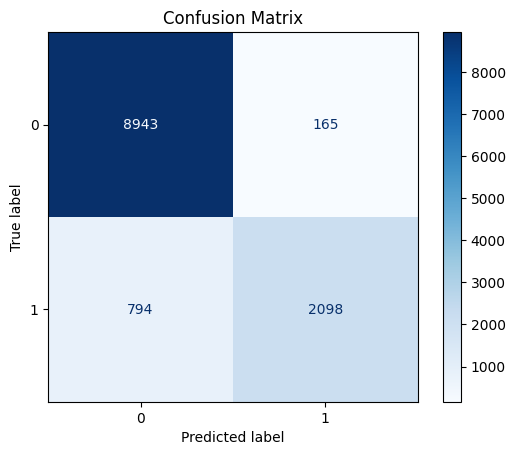


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9108
           1       0.93      0.73      0.81      2892

    accuracy                           0.92     12000
   macro avg       0.92      0.85      0.88     12000
weighted avg       0.92      0.92      0.92     12000



In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

y_pred_dt = dt.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy: {:.2f}%".format(accuracy_dt * 100))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Display precision, recall, F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))



```
# Định dạng của đoạn này là mã
```

Bootstrap sampling

In [15]:
def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, n_samples, replace=True)
    return X.iloc[idxs], y.iloc[idxs]

def most_common_label(y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common

Random Forest

In [16]:
class RandomForest:

    def __init__(self, n_trees=10, min_samples_split=2,
                 max_depth=10, n_feats=None):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(min_samples_split=self.min_samples_split,
                max_depth=self.max_depth, n_feats=self.n_feats)
            X_samp, y_samp = bootstrap_sample(X, y)
            tree.fit(X_samp, y_samp)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)


In [17]:
rf = RandomForest(n_trees=6, n_feats=5)
rf.fit(X_train, y_train)

Calculating accuracy

<ipython-input-12-300cfeb341c0>:83: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[node.feature] <= node.threshold:


Accuracy: 92.18%


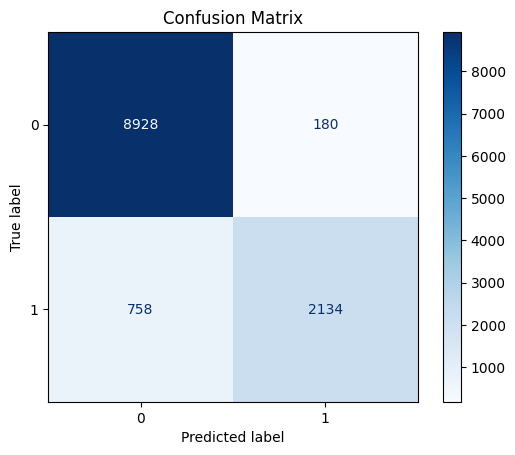


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9108
           1       0.92      0.74      0.82      2892

    accuracy                           0.92     12000
   macro avg       0.92      0.86      0.88     12000
weighted avg       0.92      0.92      0.92     12000



In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Display precision, recall, F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



 **USING XGBOOSTING**


In [19]:
class DecisionTreeXG:

    def __init__(self, min_samples_split=2, max_depth=10, n_feats=None, reg_lambda=1):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None
        self.gradient = None
        self.hessian = None
        self.reg_lambda = reg_lambda

    def fit(self, X, y, gradient=None, hessian=None, reg_lambda=None):
        self.gradient = np.array(gradient) if gradient is not None else None
        self.hessian = np.array(hessian) if hessian is not None else None

        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for _, x in X.iterrows()])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # stopping criteria
        if (depth >= self.max_depth
                or n_labels == 1
                or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        # greedily select the best split according to information gain
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

        left_idxs, right_idxs = self._split(X.iloc[:, best_feat], best_thresh)
        left = self._grow_tree(X.iloc[left_idxs, :], y.iloc[left_idxs], depth+1)
        right = self._grow_tree(X.iloc[right_idxs, :], y.iloc[right_idxs], depth+1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None

        for feat_idx in feat_idxs:
            X_column = X.iloc[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                left_idxs, right_idxs = self._split(X_column, threshold)

                # Handle empty splits to avoid division by zero
                if len(left_idxs) == 0 or len(right_idxs) == 0:
                    continue

                gain = self._xgboost_gain(left_idxs, right_idxs)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _xgboost_gain(self, left_idxs, right_idxs):
        # Calculate the gain using XGBoost's formula
        if self.gradient is not None and self.hessian is not None:
            if self.gradient.ndim == 0:
                G_left = self.gradient * len(left_idxs)
                G_right = self.gradient * len(right_idxs)
            else:
                G_left = np.sum(self.gradient[left_idxs])
                G_right = np.sum(self.gradient[right_idxs])

            if self.hessian.ndim == 0:
                H_left = self.hessian * len(left_idxs)
                H_right = self.hessian * len(right_idxs)
            else:
                H_left = np.sum(self.hessian[left_idxs])
                H_right = np.sum(self.hessian[right_idxs])


            gain = 0.5 * (
              (G_left**2 / (H_left + self.reg_lambda)) +
              (G_right**2 / (H_right + self.reg_lambda)) -
              ((G_left + G_right)**2 / (H_left + H_right + self.reg_lambda))
            )
        else:
            gain = 0

        return gain

    def _information_gain(self, y, X_column, split_thresh):
        # parent loss
        parent_entropy = entropy(y)

        # generate split
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # compute the weighted avg. of the loss for the children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y.iloc[left_idxs]), entropy(y.iloc[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        # Check if the counter is empty before accessing elements
        if counter:
            most_common = counter.most_common(1)[0][0]
            return most_common
        else:
            return 0

In [20]:
import numpy as np
from collections import Counter

class XGBoost:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, reg_lambda=1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.reg_lambda = reg_lambda  # Regularization parameter
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        y_pred = np.zeros(len(y))

        for i in range(self.n_estimators):
            # Calculate gradient and hessian (for XGBoost's objective function)
            gradient = y - self._sigmoid(y_pred)  # For log loss
            hessian = self._sigmoid(y_pred) * (1 - self._sigmoid(y_pred))

            # Fit a regression tree to the gradient
            tree = DecisionTreeXG(max_depth=self.max_depth)
            tree.fit(X, gradient, hessian, self.reg_lambda)
            self.trees.append(tree)

            # Update predictions
            y_pred += self.learning_rate * tree.predict(X)

    def predict(self, X):
        y_pred = np.zeros(len(X))
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return (self._sigmoid(y_pred) >= 0.5).astype(int)  # Apply sigmoid for probability prediction

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _log_loss(self, y_true, y_pred):
        # Avoid log(0) errors
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [21]:
xgb = XGBoost(n_estimators=10, learning_rate=0.1, max_depth=3)
xgb.fit(X_train, y_train)

<ipython-input-19-b43453c2118b>:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[node.feature] <= node.threshold:


<ipython-input-19-b43453c2118b>:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[node.feature] <= node.threshold:


Gradient Boosting Accuracy: 75.90%


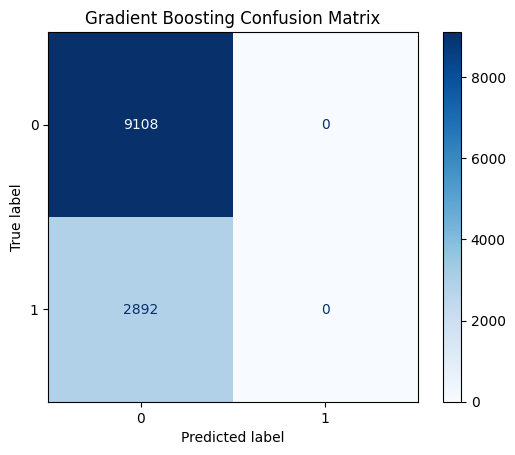


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      9108
           1       0.00      0.00      0.00      2892

    accuracy                           0.76     12000
   macro avg       0.38      0.50      0.43     12000
weighted avg       0.58      0.76      0.66     12000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
# Make predictions on the test set
y_pred_gb = xgb.predict(X_test)

# Evaluate the model
accuracy_gbc = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy: {:.2f}%".format(accuracy_gbc * 100))

# Compute the confusion matrix
cm_gbc = confusion_matrix(y_test, y_pred_gb)

# Plot the confusion matrix
disp_gbc = ConfusionMatrixDisplay(confusion_matrix=cm_gbc)
disp_gbc.plot(cmap=plt.cm.Blues)
plt.title("Gradient Boosting Confusion Matrix")
plt.show()

# Display precision, recall, F1-score
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))